# Bacon  

`bacon::bacon()` is a function that decomposes two-way fixed effects models into all 2x2 estimates and their weights following Goodman-Bacon (2018).

## Example: Castle Doctrine
The following example comes from Cheng and Hoekstra (2013, JHR). The authors estimate the effect of "castle doctrines," state laws that make it easier to use lethal force in self defenense. The data set `castle` contains state/year level informaton from 2000-2010 on crime rates and whether or not the state had a castle doctrine in effect. Here we replicate the analysis on homicide rates. The key variables are :
* `state`
* `year`
* `l_homicide` log of the homicide rate
* `post` indicaticator for whether a castle doctrine law was in effect

In [3]:
library(bacon)
library(ggplot2)
df_bacon <- bacon(l_homicide ~ post,
                  data = bacon::castle,
                  id_var = "state",
                  time_var = "year")

[1] "Two-way FE estimate = 0.0818116169306475"
                  type avg_estimate     weight
1        Early vs Late  -0.01812884 0.05976325
2        Late vs Early  -0.01812884 0.03189818
3 Treated vs Untreated   0.12391825 0.90833857



First we make sure that the weighted average of the decomposition equals the two-way fixed effects estimate:


In [4]:
fit_tw <- lm(l_homicide ~ post + factor(state) + factor(year), 
             data = bacon::castle)
print(paste("Two-way FE estimate =", fit_tw$coefficients[2]))

[1] "Two-way FE estimate = 0.0818116169306471"


Now, we plot each 2x2 estimate and its weight to see what is driving the result:

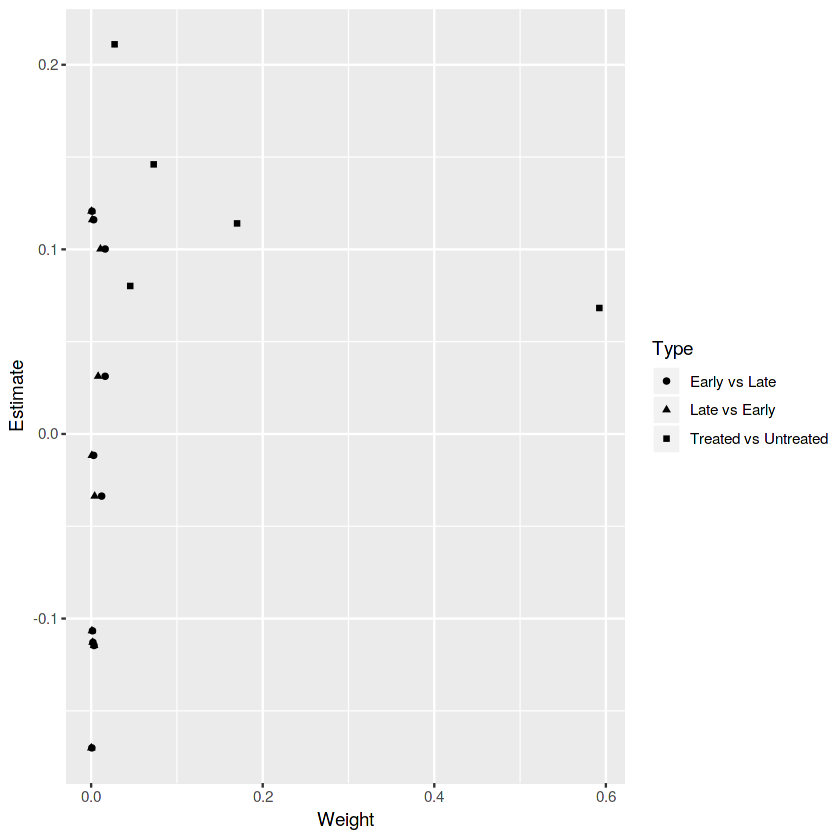

In [5]:
ggplot(df_bacon) +
  aes(x = weight, y = estimate, shape = factor(type)) +
  labs(x = "Weight", y = "Estimate", shape = "Type") +
  geom_point()

In this example, one estimate has almost 60 percent of the weight: states treated in 2006 vs states that are never treated.

In [6]:
top_weight <- df_bacon[order(-df_bacon$weight), ][1, ]
print(top_weight)

  treated untreated   estimate    weight                 type
7    2006     99999 0.06823587 0.5923947 Treated vs Untreated
